In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

# from scipy import optimize
# from consav import linear_interp

from FEmodel import FEModelClass

Notebook that illustrates the baseline fixed effects buffer stock model with heterogeneous discount factors and income profiles.
The AFE monte carlo experiments are implemented in a separate notebook to be finished.

## Define and solve the model

In [2]:
model = FEModelClass()
model.solve()
model.prepare_simulate()
model.simulate()

last period solved in 2.9 secs
first period problem solved in 0.0 secs
model solved in 8.6 secs
model prepared for simulation in 0.0
model simulated in 4.4 secs


**Extract namespaces**

In [4]:
par = model.par
sol = model.sol
sim = model.sim

## Show policy functions

**Plot the policy functions for $\alpha^l$ and $\alpha^s$ as a function of $\beta$ and $\tilde{\alpha}$**

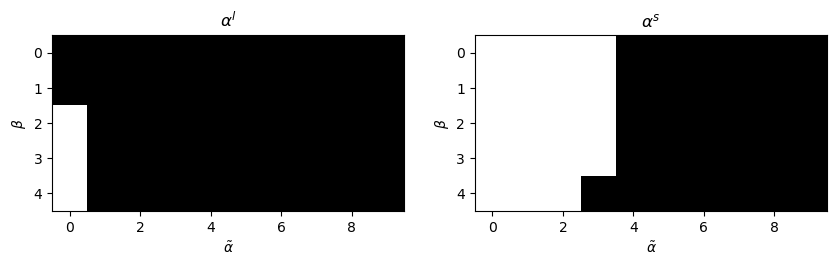

In [5]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)

ax.imshow(sol.alpha_l,cmap='binary')
ax.set_xlabel(r'$\tilde{\alpha}$')
ax.set_ylabel(r'$\beta$')
ax.set_title(r'$\alpha^l$')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(sol.alpha_s, cmap='binary')
ax2.set_xlabel(r'$\tilde{\alpha}$')
ax2.set_ylabel(r'$\beta$')
ax2.set_title(r'$\alpha^s$')

plt.show()

**Consumption, split by $\beta$**

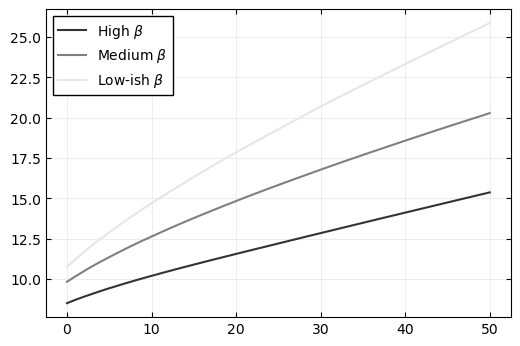

In [6]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,sol.c[0,-1,-1,-1,-1,:], color = '0.2', label = r'High $\beta$',zorder=2)
ax.plot(par.a_grid,sol.c[0,-3,-1,-1,-1,:], color = '0.5', label = r'Medium $\beta$',zorder=2)
ax.plot(par.a_grid,sol.c[0,0,-1,-1,-1,:], color = '0.9', label = r'Low-ish $\beta$',zorder=2)

# ax.set_ylim(0,2.1)
# ax.set_xlim(0,5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.show()

**Consumption, Split by $\alpha$**

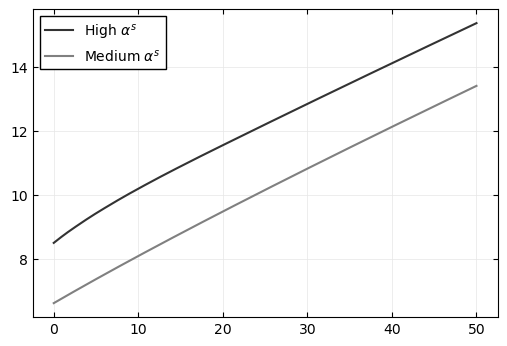

In [7]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,sol.c[0,-1,-1,1,-1,:], color = '0.2', label = r'High $\alpha^s$',zorder=2)
ax.plot(par.a_grid,sol.c[0,-1,-1,0,-1,:], color = '0.5', label = r'Medium $\alpha^s$',zorder=2)
# ax.plot(par.a_grid,sol.c[0,-1,-1,-1,-1,:], color = '0.9', label = r'Low-ish $\beta$',zorder=2)

# ax.set_ylim(0,2.1)
# ax.set_xlim(0,5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.show()

## Show simulation results

**Asset distribution in the middle of the lifetime**

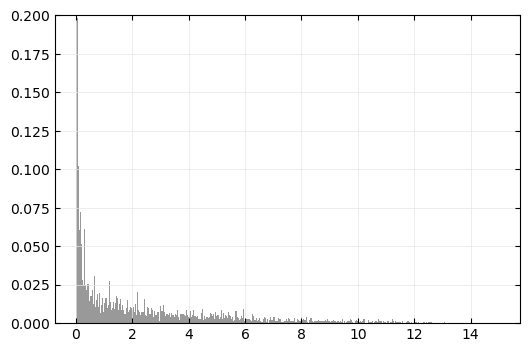

In [33]:
h_ = int(np.floor((par.H-1)/2)) # returns an integer around the middle of life

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.hist(sim.a[h_,:],bins=400,density=True, color='0.5',alpha=.8)
ax.set_ylim(0,.2)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.show()

**Average life cycle of assets**

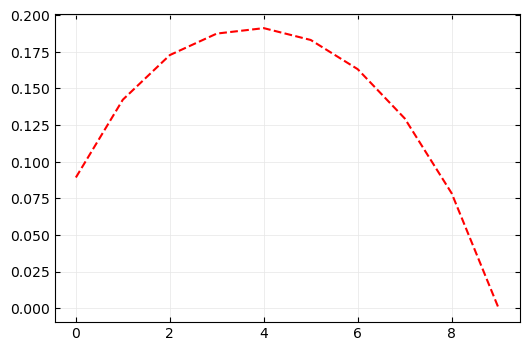

In [40]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(np.mean(sim.a,axis=1), ls='--', c='red')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')